In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head(9)

Saving StudentsPerformance.csv to StudentsPerformance (3).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67


In [ ]:
#exercice 1

import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

subjects = ['math score', 'reading score', 'writing score']

print("===== EXERCICE 1 : TENDANCES CENTRALES =====\n")

for subject in subjects:
    mean_value = df[subject].mean()
    median_value = df[subject].median()
    mode_value = df[subject].mode()[0]

    print(f"--- {subject.upper()} ---")
    print(f"Moyenne : {mean_value:.2f}")
    print(f"Médiane : {median_value:.2f}")
    print(f"Mode    : {mode_value}")

    if abs(mean_value - median_value) < 1:
        print("Distribution approximativement symétrique\n")
    elif mean_value > median_value:
        print("Asymétrie positive (queue à droite)\n")
    else:
        print("Asymétrie négative (queue à gauche)\n")


===== EXERCICE 1 : TENDANCES CENTRALES =====

--- MATH SCORE ---
Moyenne : 66.09
Médiane : 66.00
Mode    : 65
Distribution approximativement symétrique

--- READING SCORE ---
Moyenne : 69.17
Médiane : 70.00
Mode    : 72
Distribution approximativement symétrique

--- WRITING SCORE ---
Moyenne : 68.05
Médiane : 69.00
Mode    : 74
Distribution approximativement symétrique



**Si la moyenne est proche de la médiane la distribution est symétrique, si la moyenne est supérieure à la médiane il y a une asymétrie positive (queue à droite) due à quelques grandes valeurs, et si la moyenne est inférieure à la médiane il y a une asymétrie négative (queue à gauche) causée par quelques petites valeurs.**

In [ ]:
#exercice 2

import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

subjects = ['math score', 'reading score', 'writing score']

print("===== EXERCICE 2 : ANALYSE DE LA DISPERSION =====\n")

max_range = 0
max_std = 0
subject_max_range = ""
subject_max_std = ""

for subject in subjects:

    range_value = df[subject].max() - df[subject].min()

    variance_value = df[subject].var()
    std_value = df[subject].std()

    print(f"--- {subject.upper()} ---")
    print(f"Étendue     : {range_value}")
    print(f"Variance    : {variance_value:.2f}")
    print(f"Écart-type  : {std_value:.2f}")

    if std_value < 15:
        print("Interprétation : Faible variabilité (scores homogènes)\n")
    else:
        print("Interprétation : Forte variabilité (scores hétérogènes)\n")

    if range_value > max_range:
        max_range = range_value
        subject_max_range = subject

    if std_value > max_std:
        max_std = std_value
        subject_max_std = subject

print("===== RÉSUMÉ =====")
print(f"La matière avec la plus grande étendue est : {subject_max_range}")
print(f"La matière avec la plus grande variabilité (écart-type) est : {subject_max_std}")


===== EXERCICE 2 : ANALYSE DE LA DISPERSION =====

--- MATH SCORE ---
Étendue     : 100
Variance    : 229.92
Écart-type  : 15.16
Interprétation : Forte variabilité (scores hétérogènes)

--- READING SCORE ---
Étendue     : 83
Variance    : 213.17
Écart-type  : 14.60
Interprétation : Faible variabilité (scores homogènes)

--- WRITING SCORE ---
Étendue     : 90
Variance    : 230.91
Écart-type  : 15.20
Interprétation : Forte variabilité (scores hétérogènes)

===== RÉSUMÉ =====
La matière avec la plus grande étendue est : math score
La matière avec la plus grande variabilité (écart-type) est : writing score


**Une matière ayant la plus grande étendue et le plus grand écart-type présente une forte variabilité avec des écarts importants entre les notes des étudiants, tandis qu’une étendue et un écart-type faibles indiquent des scores homogènes et des performances similaires.**

In [ ]:
#exercice 3

import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

subjects = ['math score', 'reading score', 'writing score']

print("===== EXERCICE 3 : QUARTILES ET IQR =====\n")

for subject in subjects:

    Q1 = df[subject].quantile(0.25)
    Q2 = df[subject].quantile(0.50)
    Q3 = df[subject].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[subject] < lower_bound) | (df[subject] > upper_bound)]

    print(f"--- {subject.upper()} ---")
    print(f"Q1 (25%)       : {Q1}")
    print(f"Q2 (Médiane)   : {Q2}")
    print(f"Q3 (75%)       : {Q3}")
    print(f"IQR            : {IQR}")
    print(f"Limite inférieure : {lower_bound}")
    print(f"Limite supérieure : {upper_bound}")
    print(f"Nombre de valeurs aberrantes : {len(outliers)}")

    if len(outliers) > 0:
        print("Interprétation : Présence de valeurs aberrantes (scores extrêmes)\n")
    else:
        print("Interprétation : Pas de valeurs aberrantes (distribution normale)\n")


===== EXERCICE 3 : QUARTILES ET IQR =====

--- MATH SCORE ---
Q1 (25%)       : 57.0
Q2 (Médiane)   : 66.0
Q3 (75%)       : 77.0
IQR            : 20.0
Limite inférieure : 27.0
Limite supérieure : 107.0
Nombre de valeurs aberrantes : 8
Interprétation : Présence de valeurs aberrantes (scores extrêmes)

--- READING SCORE ---
Q1 (25%)       : 59.0
Q2 (Médiane)   : 70.0
Q3 (75%)       : 79.0
IQR            : 20.0
Limite inférieure : 29.0
Limite supérieure : 109.0
Nombre de valeurs aberrantes : 6
Interprétation : Présence de valeurs aberrantes (scores extrêmes)

--- WRITING SCORE ---
Q1 (25%)       : 57.75
Q2 (Médiane)   : 69.0
Q3 (75%)       : 79.0
IQR            : 21.25
Limite inférieure : 25.875
Limite supérieure : 110.875
Nombre de valeurs aberrantes : 5
Interprétation : Présence de valeurs aberrantes (scores extrêmes)



**Une IQR élevée indique une forte dispersion des scores centraux et la présence de valeurs en dehors des limites, signale des notes aberrantes (très élevées ou très faibles), tandis que leur absence traduit une distribution relativement homogène.**

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("StudentsPerformance.csv")

df_long = df.melt(
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='Subject',
    value_name='Score'
)

fig = px.histogram(
    df_long,
    x="Score",
    color="Subject",
    barmode="overlay",
    nbins=20,
    opacity=0.6
)

fig.update_layout(
    title="Distribution des Scores (Math, Reading, Writing)",
    xaxis_title="Score",
    yaxis_title="Fréquence"
)

fig.show()


**Histogramme : Il permet d’observer la forme de la distribution des notes (symétrique, asymétrique ou bimodale) ainsi que la concentration et la dispersion des fréquences.**

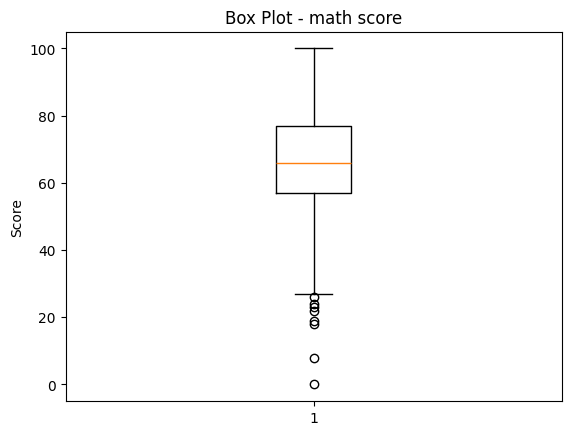

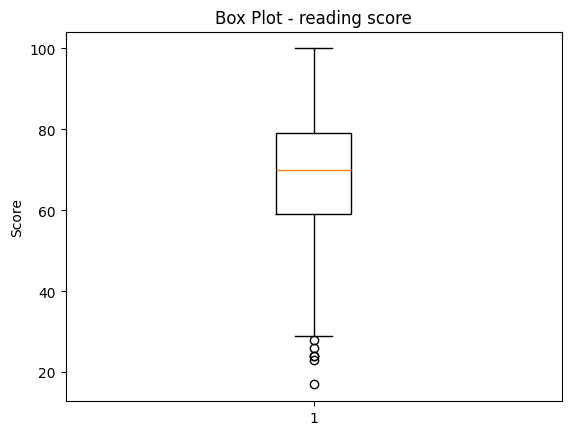

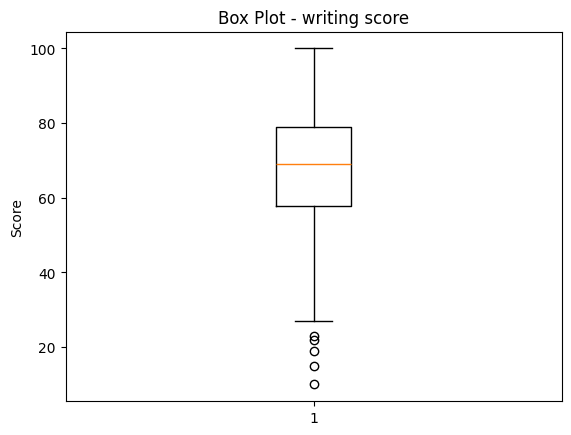

In [ ]:
for subject in subjects:
    plt.figure()
    plt.boxplot(df[subject])
    plt.title(f"Box Plot - {subject}")
    plt.ylabel("Score")
    plt.show()


**Boîte à moustaches (Box plot) : Il montre la médiane, les quartiles, l’IQR et met en évidence la dispersion des scores ainsi que les éventuelles valeurs aberrantes.**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

means = [df[subject].mean() for subject in subjects]

x = subjects

fig = go.Figure()

fig.add_bar(
    x=x,
    y=means,
    width=0.3,
    marker_color='skyblue',
    offset=-0.15,
    name="male"
)

fig.add_bar(
    x=x,
    y=means,
    width=0.3,
    marker_color='salmon',
    offset=0.15,
    name="female"
)

fig.update_layout(
    title="Comparaison des Moyennes des Matières",
    xaxis_title="Matières",
    yaxis_title="Moyenne",
    barmode='overlay'
)

fig.show()



**Graphique en barres : Il permet de comparer clairement les performances moyennes (ou totales) entre différentes matières.**

In [ ]:

import pandas as pd
import plotly.express as px

df = pd.read_csv("StudentsPerformance.csv")

df_long = df.melt(
    id_vars='gender',
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='Subject',
    value_name='Score'
)

fig = px.bar(
    df_long,
    x='gender',
    y='Score',
    color='Subject',
    barmode='group',
    title="Comparaison des Scores selon le Genre"
)

fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Moyenne des Scores"
)

fig.show()


**Ce graphique montre la comparaison des moyennes des scores en mathématiques, lecture et écriture selon le genre, permettant d’identifier quelle matière présente les meilleures performances pour chaque groupe et de voir s’il existe un écart significatif entre les garçons et les filles.**